In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [10]:
!pip install tensorflow

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.2807 - loss: 1.9169 - val_accuracy: 0.5188 - val_loss: 1.3563
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.4987 - loss: 1.3905 - val_accuracy: 0.5947 - val_loss: 1.1515
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5791 - loss: 1.1907 - val_accuracy: 0.6437 - val_loss: 1.0412
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6257 - loss: 1.0727 - val_accuracy: 0.6641 - val_loss: 0.9593
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.6569 - loss: 0.9764 - val_accuracy: 0.6704 - val_loss: 0.9556
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6826 - loss: 0.9022 - val_accuracy: 0.6941 - val_loss: 0.8708
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7139 - loss: 0.8365 - val_accuracy: 0.7137 - val_loss: 0.8398
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.7294 - loss: 0.7687 - 

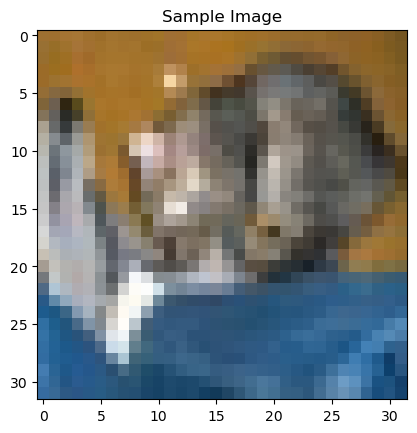

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Class:cat


In [12]:
# Load the CIFAR-10 dataset
(x_train, y_train),(x_test,y_test)=cifar10.load_data()

# preprocess the data

x_train = x_train.astype('float32') /255.0 #normalize pixel values to 0-1
x_test = x_test.astype('float32') /255.0    #normalize pixel values to 0-1
y_train=to_categorical(y_train, 10)      #one-hot encode labels
y_test=to_categorical(y_test, 10)     #one-hot encode labels

#build the CNN model
model = Sequential ([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32,3)), #convolutional layer
    MaxPooling2D((2,2)),                                          #Maxpooling layer
    Conv2D(64, (3,3), activation='relu'),                           #secondconvolutional layer
    MaxPooling2D((2,2)),                                             #secongMaxpooling layer
    Conv2D(128, (3,3), activation='relu'),                           #thirdconvolutional layer
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') #output layer
])                 
#compile the model
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

#train the model

model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

#evaluate the model

test_loss, test_accuracy = model.evaluate(x_test,y_test,verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

#predicton a sampe image
import numpy as np
import matplotlib.pyplot as plt

#choose a sample image from the twst set

sample_image = x_test[0]
plt.imshow(sample_image)  #display the image
plt.title("Sample Image")
plt.show()

#make a prediction
prediction= model.predict(np.expand_dims(sample_image,axis=0))
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Class:{predicted_class}")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.2720 - loss: 1.9434 - val_accuracy: 0.4734 - val_loss: 1.4381
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4755 - loss: 1.4587 - val_accuracy: 0.5723 - val_loss: 1.2125
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5428 - loss: 1.2814 - val_accuracy: 0.6157 - val_loss: 1.1076
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.5935 - loss: 1.1510 - val_accuracy: 0.6414 - val_loss: 1.0284
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6313 - loss: 1.0479 - val_accuracy: 0.6626 - val_loss: 0.9699
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.6574 - loss: 0.9809 - val_accuracy: 0.6794 - val_loss: 0.9211
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6772 - loss: 0.9135 - val_accuracy: 0.6828 - val_loss: 0.9095
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6940 - loss: 0.8644 - 

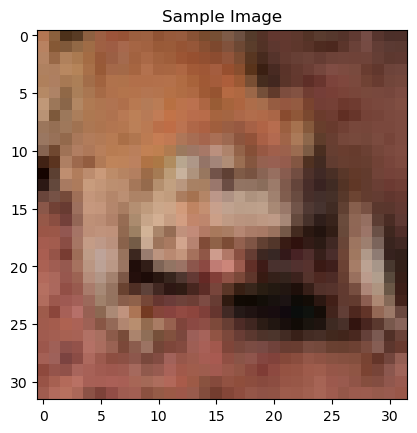

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicted Class:frog


In [13]:
# Load the CIFAR-10 dataset
(x_train, y_train),(x_test,y_test)=cifar10.load_data()

# preprocess the data

x_train = x_train.astype('float32') /255.0 #normalize pixel values to 0-1
x_test = x_test.astype('float32') /255.0    #normalize pixel values to 0-1
y_train=to_categorical(y_train, 10)      #one-hot encode labels
y_test=to_categorical(y_test, 10)     #one-hot encode labels

#build the CNN model
model = Sequential ([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32,3)), #convolutional layer
    MaxPooling2D((2,2)),                                          #Maxpooling layer
    Conv2D(64, (3,3), activation='relu'),                           #secondconvolutional layer
    MaxPooling2D((2,2)),                                             #secongMaxpooling layer
    Conv2D(128, (3,3), activation='relu'),                           #thirdconvolutional layer
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') #output layer
])                 
#compile the model
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

#train the model

model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

#evaluate the model

test_loss, test_accuracy = model.evaluate(x_test,y_test,verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

#predicton a sampe image
import numpy as np
import matplotlib.pyplot as plt

#choose a sample image from the twst set

sample_image = x_test[5]
plt.imshow(sample_image)  #display the image
plt.title("Sample Image")
plt.show()

#make a prediction
prediction= model.predict(np.expand_dims(sample_image,axis=0))
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Class:{predicted_class}")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.2659 - loss: 1.9643 - val_accuracy: 0.5080 - val_loss: 1.3653
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.4960 - loss: 1.4020 - val_accuracy: 0.5593 - val_loss: 1.2285
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5611 - loss: 1.2375 - val_accuracy: 0.5752 - val_loss: 1.1913
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6056 - loss: 1.1246 - val_accuracy: 0.6460 - val_loss: 0.9980
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6420 - loss: 1.0271 - val_accuracy: 0.6546 - val_loss: 0.9818
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.6704 - loss: 0.9542 - val_accuracy: 0.6673 - val_loss: 0.9455
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6915 - loss: 0.8889 - val_accuracy: 0.6922 - val_loss: 0.8868
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.7059 - loss: 0.8397 - 

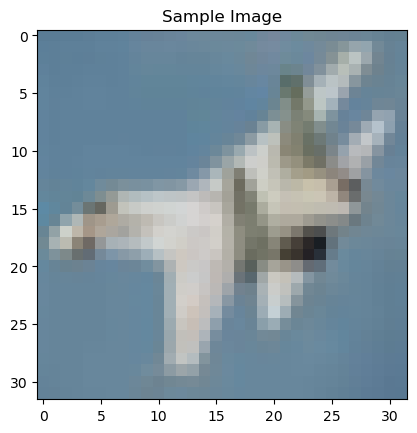

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted Class:deer


In [14]:
# Load the CIFAR-10 dataset
(x_train, y_train),(x_test,y_test)=cifar10.load_data()

# preprocess the data

x_train = x_train.astype('float32') /255.0 #normalize pixel values to 0-1
x_test = x_test.astype('float32') /255.0    #normalize pixel values to 0-1
y_train=to_categorical(y_train, 10)      #one-hot encode labels
y_test=to_categorical(y_test, 10)     #one-hot encode labels

#build the CNN model
model = Sequential ([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32,3)), #convolutional layer
    MaxPooling2D((2,2)),                                          #Maxpooling layer
    Conv2D(64, (3,3), activation='relu'),                           #secondconvolutional layer
    MaxPooling2D((2,2)),                                             #secongMaxpooling layer
    Conv2D(128, (3,3), activation='relu'),                           #thirdconvolutional layer
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') #output layer
])                 
#compile the model
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

#train the model

model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

#evaluate the model

test_loss, test_accuracy = model.evaluate(x_test,y_test,verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

#predicton a sampe image
import numpy as np
import matplotlib.pyplot as plt

#choose a sample image from the twst set

sample_image = x_test[10]
plt.imshow(sample_image)  #display the image
plt.title("Sample Image")
plt.show()

#make a prediction
prediction= model.predict(np.expand_dims(sample_image,axis=0))
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Class:{predicted_class}")